In [13]:
# imports

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

motor = '2D'

In [14]:
# reading hysteresis data

hysteresisTrainTotal = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/{}/hysteresis_all_scaled_train.csv'.format(motor))['total']
hysteresisTestTotal = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/{}/hysteresis_all_scaled_test.csv'.format(motor))['total']

hysteresis = ({'train' : hysteresisTrainTotal,
               'test' : hysteresisTestTotal})

In [15]:
# reading Id Iq data

IdIqTrain = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/{}/idiq_all_scaled_train.csv'.format(motor))
IdIqTest = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/{}/idiq_all_scaled_test.csv'.format(motor))

id = ({'train' : IdIqTrain['id'],
         'test' : IdIqTest['id']})

iq = ({'train' : IdIqTrain['iq'],
         'test' : IdIqTest['iq']})

In [16]:
# reading joule data

jouleTrainTotal = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/{}/joule_all_scaled_train.csv'.format(motor))['total']
jouleTestTotal = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/{}/joule_all_scaled_test.csv'.format(motor))['total']

joule = ({'train' : jouleTrainTotal,
          'test' : jouleTestTotal})

In [17]:
# reading speed data

speedTrain = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/{}/speed_all_scaled_train.csv'.format(motor))
speedTest = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/{}/speed_all_scaled_test.csv'.format(motor))

speed = ({'train' : speedTrain,
          'test' : speedTest})

In [18]:
# reading speed data

speedTrainN = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/{}/speed_all_scaled_train.csv'.format(motor))['N']
speedTestN = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/{}/speed_all_scaled_test.csv'.format(motor))['N']

speed = ({'train' : speedTrainN,
          'test' : speedTestN})


In [19]:
# reading Xgeom data

xgeomTrain = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/{}/xgeom_all_scaled_train.csv'.format(motor))
xgeomTest = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/{}/xgeom_all_scaled_test.csv'.format(motor))

d1 = ({'train' : xgeomTrain['d1'],
         'test' : xgeomTest['d1']})
d2 = ({'train' : xgeomTrain['d2'],
         'test' : xgeomTest['d2']})
d3 = ({'train' : xgeomTrain['d3'],
         'test' : xgeomTest['d3']})
d4 = ({'train' : xgeomTrain['d4'],
         'test' : xgeomTest['d4']})
d5 = ({'train' : xgeomTrain['d5'],
         'test' : xgeomTest['d5']})
d6 = ({'train' : xgeomTrain['d6'],
         'test' : xgeomTest['d6']})
d7 = ({'train' : xgeomTrain['d7'],
         'test' : xgeomTest['d7']})
d8 = ({'train' : xgeomTrain['d8'],
         'test' : xgeomTest['d8']})
d9 = ({'train' : xgeomTrain['d9'],
         'test' : xgeomTest['d9']})

r1 = ({'train' : xgeomTrain['r1'],
         'test' : xgeomTest['r1']})

t1 = ({'train' : xgeomTrain['t1'],
         'test' : xgeomTest['t1']})


In [20]:
def combinedHist (name, train, test, binss = 100):
    fig = plt.figure(figsize = (6, 6))
    grid = plt.GridSpec(4, 4, hspace = 0.2, wspace = 0.4)

    main_ax = fig.add_subplot(grid[:-1, 1:])

    y_hist = fig.add_subplot(grid[:-1, 0],
                            xticklabels = [],
                            sharey = main_ax)
    x_hist = fig.add_subplot(grid[-1, 1:],
                            yticklabels = [],
                            sharex = main_ax)

    main_ax.hist2d(train[0:24150:5], test[0:4830],
                bins = binss, cmap = 'Blues')

    x_hist.hist(train[0:24150:5], histtype = 'stepfilled', bins = binss,
                orientation = 'vertical', color = 'green', alpha = 0.3)
    x_hist.invert_yaxis()

    y_hist.hist(test[0:4830], histtype = 'stepfilled', bins = binss,
                orientation = 'horizontal', color = 'green', alpha = 0.3)
    y_hist.invert_xaxis()

    fig.suptitle("{} - Train and Test Comparison".format(name), size = 18)
#     fig.supxlabel('Train')
#     fig.supylabel('Test')

In [21]:
def hist2d (name, train, test, binss = 100):
    plt.hist2d(train[0:24150:5], test[0:4830], bins = binss)

    plt.title('{} - Train and Test'.format(name))

    plt.colorbar()

    plt.xlabel('Train')
    plt.ylabel('Test')

In [22]:
def histJointPlot (data):
    sns.jointplot(data = data, x = "train", y = "test", kind = 'kde', color = 'pink')

In [23]:
def simpleHist (name, train, test, binss = 100, trainSize = 24150, interval = 5, testSize = 4830):
    plt.hist(train[0:trainSize:interval], bins = binss, alpha = 0.5, color = 'green', label = 'train')
    plt.hist(test[0:testSize], bins = binss, alpha = 0.5, color = 'pink', label = 'test')
    plt.title('{} - Train and Test'.format(name))
    plt.legend()
    plt.show()

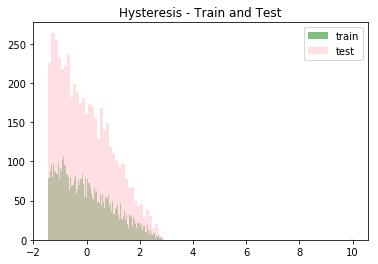

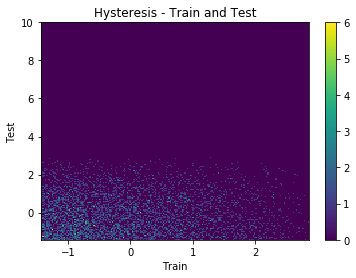

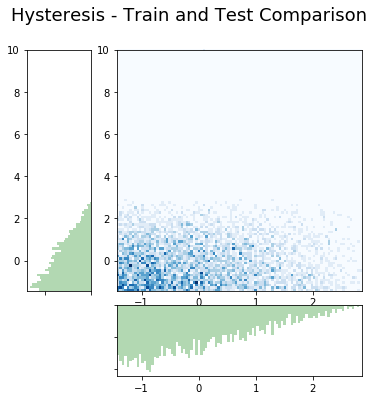

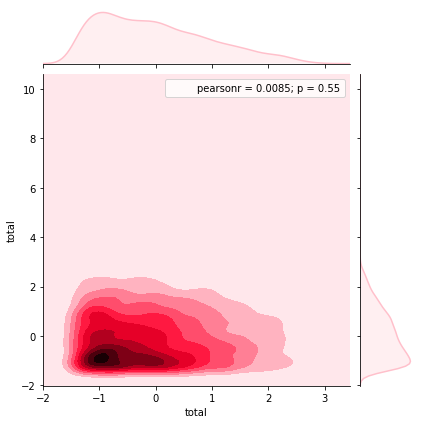

In [24]:
simpleHist("Hysteresis", hysteresis['train'], hysteresis['test'])
hist2d("Hysteresis", hysteresis['train'], hysteresis['test'], 200)
combinedHist("Hysteresis", hysteresis['train'], hysteresis['test'])
histJointPlot(hysteresis)
plt.show()

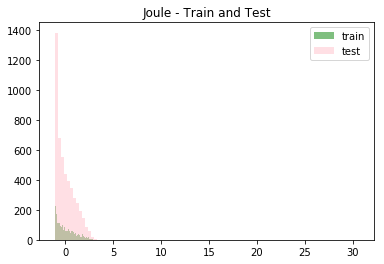

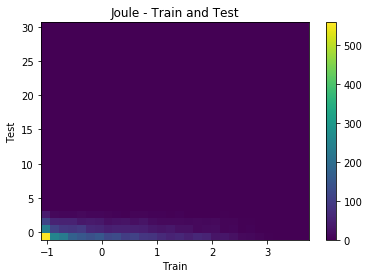

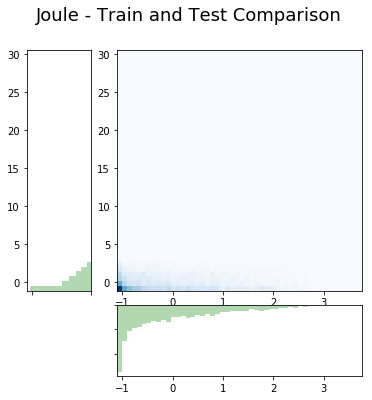

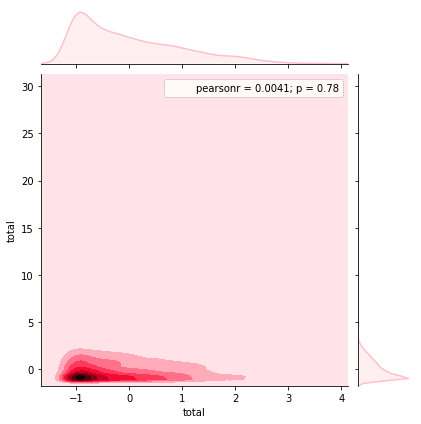

In [25]:
simpleHist("Joule", joule['train'], joule['test'])
hist2d("Joule", joule['train'], joule['test'], 30)
combinedHist("Joule", joule['train'], joule['test'], 50)
histJointPlot(joule)
plt.show()

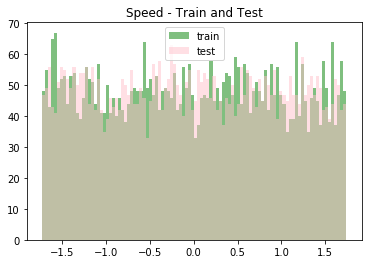

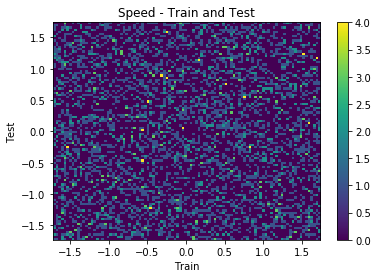

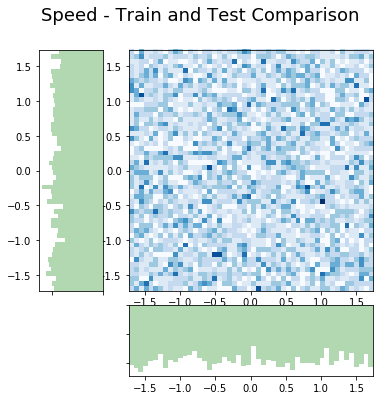

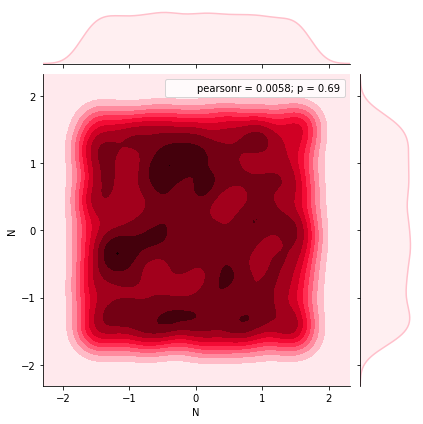

In [26]:
simpleHist("Speed", speed['train'], speed['test'])
hist2d("Speed", speed['train'], speed['test'])
combinedHist("Speed", speed['train'], speed['test'], 50)
histJointPlot(speed)
plt.show()

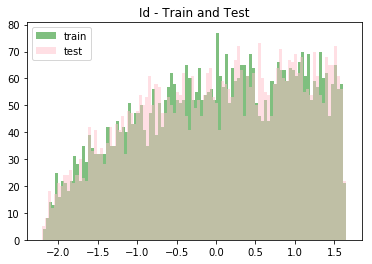

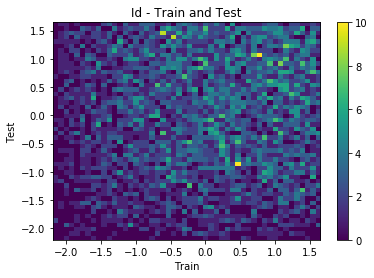

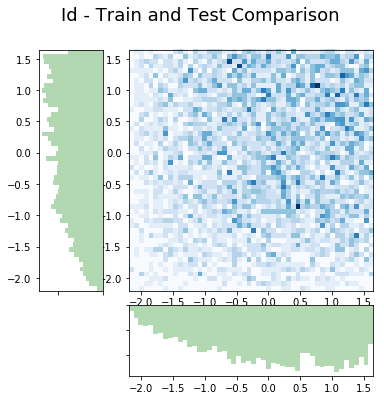

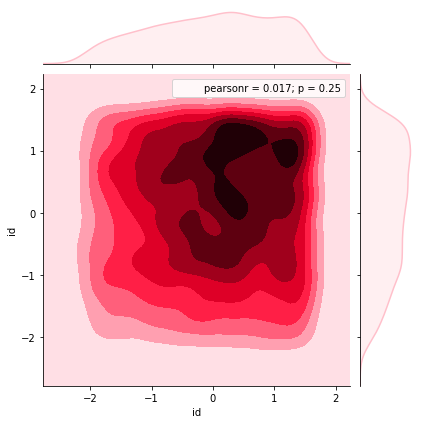

In [27]:
simpleHist("Id", id['train'], id['test'])
hist2d("Id", id['train'], id['test'], 50)
combinedHist("Id", id['train'], id['test'], 50)
histJointPlot(id)
plt.show()

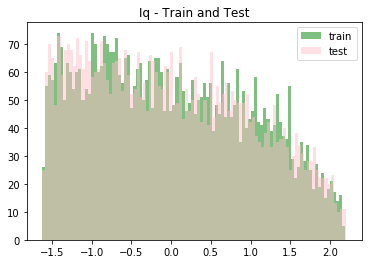

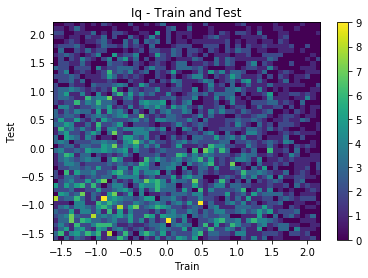

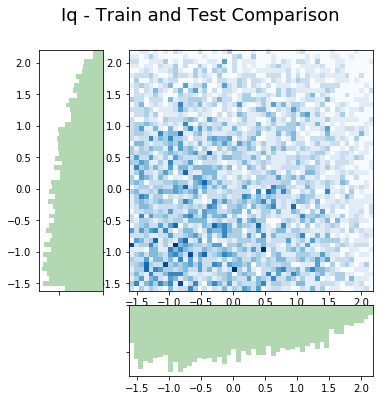

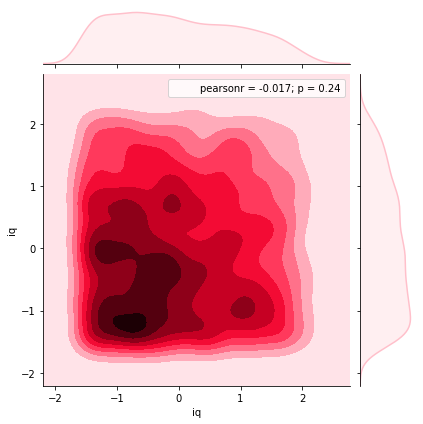

In [28]:
simpleHist("Iq", iq['train'], iq['test'])
hist2d("Iq", iq['train'], iq['test'], 50)
combinedHist("Iq", iq['train'], iq['test'], 50)
histJointPlot(iq)
plt.show()

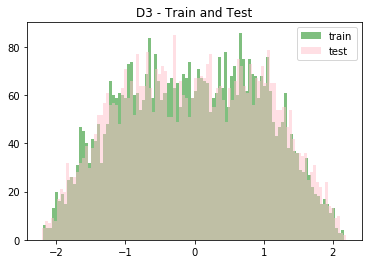

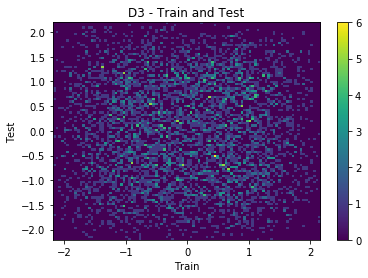

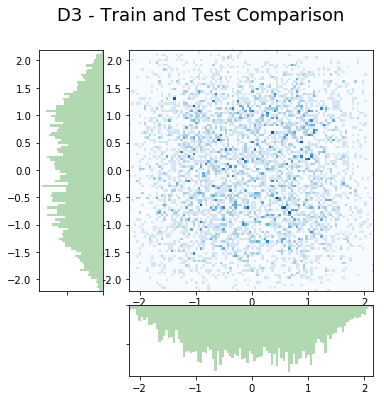

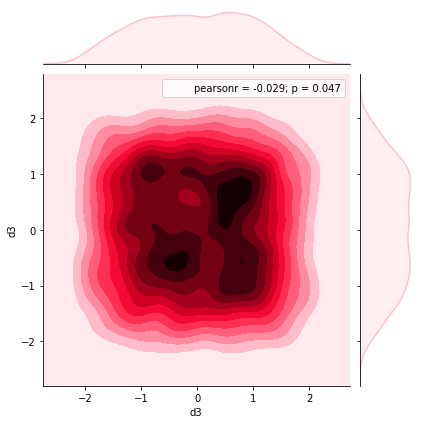

In [29]:
simpleHist("D3", d3['train'], d3['test'])
hist2d("D3", d3['train'], d3['test'])
combinedHist("D3", d3['train'], d3['test'])
histJointPlot(d3)
plt.show()

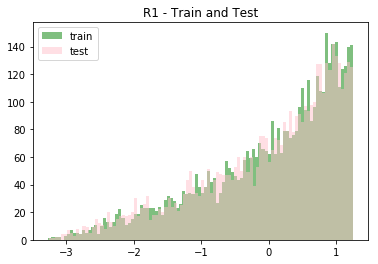

<function matplotlib.pyplot.show(*args, **kw)>

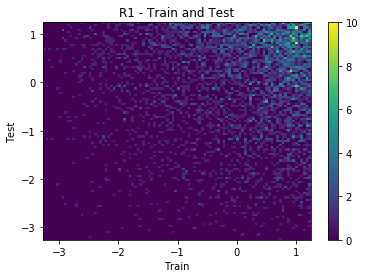

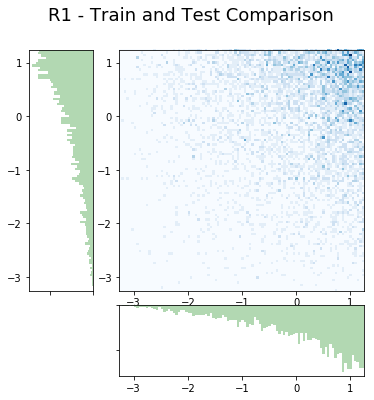

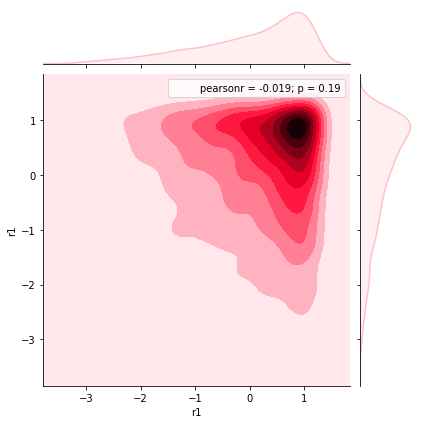

In [30]:
simpleHist("R1", r1['train'], r1['test'])
hist2d("R1", r1['train'], r1['test'])
combinedHist("R1", r1['train'], r1['test'])
histJointPlot(r1)
plt.show

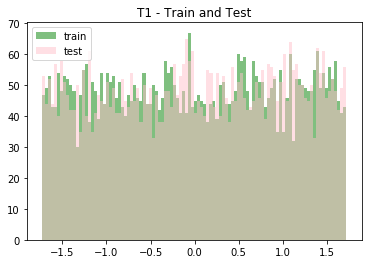

<function matplotlib.pyplot.show(*args, **kw)>

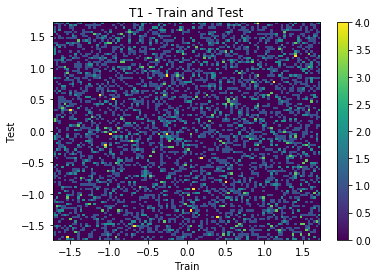

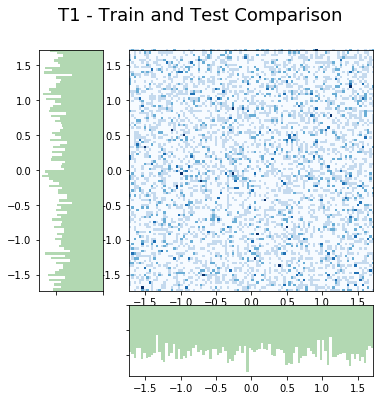

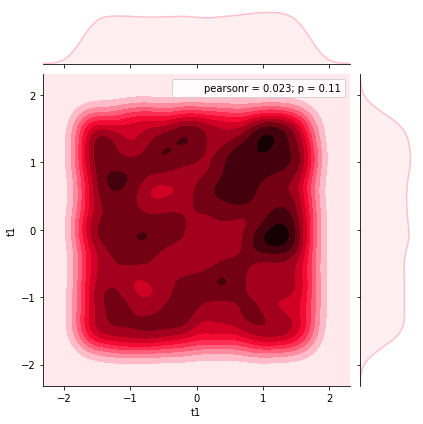

In [31]:
simpleHist("T1", t1['train'], t1['test'])
hist2d("T1", t1['train'], t1['test'])
combinedHist("T1", t1['train'], t1['test'])
histJointPlot(t1)
plt.show